In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df=pd.read_csv("C:/Users/hp/OneDrive/Desktop/kaggle notes and datasets/Job a thon/train_aug.csv")

In [50]:
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [51]:
df.shape

(1888, 22)

In [52]:
df.dtypes

campaign_id             int64
sender                  int64
subject_len             int64
body_len                int64
mean_paragraph_len      int64
day_of_week             int64
is_weekend              int64
times_of_day           object
category                int64
product                 int64
no_of_CTA               int64
mean_CTA_len            int64
is_image                int64
is_personalised         int64
is_quote                int64
is_timer                int64
is_emoticons            int64
is_discount             int64
is_price                int64
is_urgency              int64
target_audience         int64
click_rate            float64
dtype: object

In [53]:
df['times_of_day'].value_counts()

Evening    1317
Noon        447
Morning     124
Name: times_of_day, dtype: int64

In [54]:
df['day_of_week'].value_counts()

3    346
2    333
4    329
1    295
5    237
0    208
6    140
Name: day_of_week, dtype: int64

In [55]:
df['is_weekend'].value_counts()

0    1511
1     377
Name: is_weekend, dtype: int64

In [56]:
df['is_timer'].value_counts()

0    1888
Name: is_timer, dtype: int64

In [57]:
df.isna().any().sum()

0

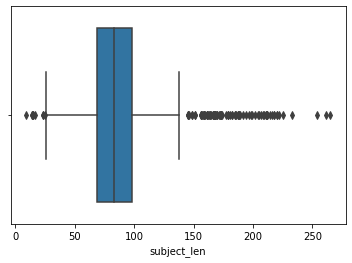

In [58]:
sns.boxplot(df['subject_len'])

In [59]:
percentile25 = df['subject_len'].quantile(0.25)
percentile75 = df['subject_len'].quantile(0.75)

In [60]:
iqr=percentile75-percentile25

In [61]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [62]:
new_df = df[(df['subject_len'] < upper_limit)]

In [63]:
new_df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


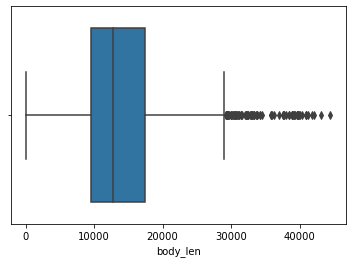

In [64]:
sns.boxplot(df['body_len'])

In [65]:
percentile25 = df['body_len'].quantile(0.25)
percentile75 = df['body_len'].quantile(0.75)

In [66]:
iqr=percentile75-percentile25

In [67]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [68]:
new_df = df[(df['body_len'] < upper_limit)]

In [69]:
df[df['body_len']>30000].shape

(75, 22)

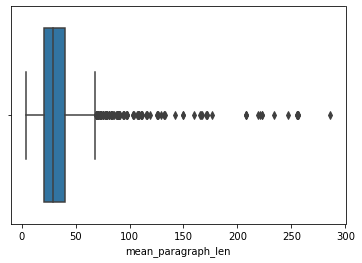

In [70]:
sns.boxplot(df['mean_paragraph_len'])

In [71]:
percentile25 = df['mean_paragraph_len'].quantile(0.25)
percentile75 = df['mean_paragraph_len'].quantile(0.75)

In [72]:
iqr=percentile75-percentile25

In [73]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [74]:
new_df = df[(df['mean_paragraph_len'] < upper_limit) ]

In [75]:
cd=['is_image','is_personalised','is_quote','is_timer','is_emoticons','is_discount','is_price','is_urgency']

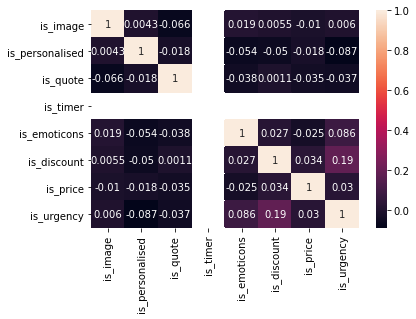

In [76]:
corrMatrix = df[cd].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [77]:
df[df['mean_paragraph_len']>75].shape

(96, 22)

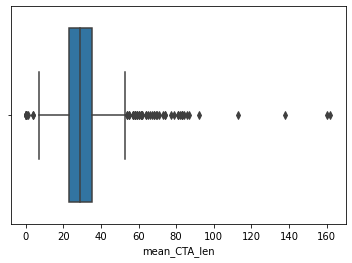

In [78]:
sns.boxplot(df['mean_CTA_len'])

In [79]:
percentile25 = df['mean_CTA_len'].quantile(0.25)
percentile75 = df['mean_CTA_len'].quantile(0.75)

In [80]:
iqr=percentile75-percentile25

In [81]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [82]:
new_df = df[(df['mean_CTA_len'] < upper_limit) ]

In [83]:
new_df.shape

(1833, 22)

In [84]:
from sklearn.preprocessing import OrdinalEncoder

In [85]:
enc=OrdinalEncoder()
v=['times_of_day']
new_df[v]=enc.fit_transform(new_df[v])

<ipython-input-85-8d6568093af9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[v]=enc.fit_transform(new_df[v])


In [86]:
df.shape

(1888, 22)

In [87]:
new_df=new_df.drop(['is_timer'],axis=1)

In [88]:
x=new_df.iloc[:,1:-1]
x

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,3,76,10439,39,5,1,2.0,6,26,3,29,0,0,0,0,0,0,0,14
1,3,54,2570,256,5,1,1.0,2,11,0,22,0,0,0,0,0,0,0,10
2,3,59,12801,16,5,1,2.0,2,11,3,23,1,0,1,0,0,0,0,16
3,3,74,11037,30,4,0,0.0,15,9,4,24,0,0,0,0,0,0,0,10
4,3,80,10011,27,5,1,2.0,6,26,3,31,0,0,1,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,3,88,1451,75,2,0,2.0,2,11,0,22,0,0,1,0,0,0,0,10
1884,3,58,10537,40,2,0,0.0,2,11,5,27,0,0,0,0,0,0,0,11
1885,3,89,11050,26,1,0,0.0,15,9,4,28,0,0,0,0,0,0,0,6
1886,3,58,10537,40,1,0,0.0,2,11,5,27,0,0,0,0,0,0,0,16


In [89]:
y=new_df['click_rate']

In [90]:
df_=pd.read_csv("C:/Users/hp/OneDrive/Desktop/kaggle notes and datasets/test_aug.csv")
df_.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14


In [91]:
df_=df_.drop(['is_timer'],axis=1)

In [92]:
df_.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_emoticons', 'is_discount',
       'is_price', 'is_urgency', 'target_audience'],
      dtype='object')

In [93]:
from sklearn.preprocessing import OrdinalEncoder

In [94]:
en=OrdinalEncoder()
w=['times_of_day']
df_[w]=en.fit_transform(df_[w])

In [95]:
df_.shape

(762, 20)

In [96]:
x1=df_.iloc[:,1:]

In [97]:
x1.shape

(762, 19)

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
model=RandomForestRegressor(n_estimators = 15, max_depth = 5, random_state = 2)

In [100]:
model.fit(x,y)

RandomForestRegressor(max_depth=5, n_estimators=15, random_state=2)

In [101]:
pred=model.predict(x1)

In [102]:
pred.round(decimals = 6)

array([0.030558, 0.433309, 0.181397, 0.192416, 0.085313, 0.02149 ,
       0.011929, 0.014888, 0.021911, 0.027751, 0.024191, 0.054882,
       0.025488, 0.026875, 0.015019, 0.01436 , 0.013679, 0.034075,
       0.028654, 0.036383, 0.024191, 0.033716, 0.013013, 0.014923,
       0.036394, 0.036951, 0.076677, 0.011817, 0.054503, 0.017657,
       0.01552 , 0.037515, 0.018537, 0.107731, 0.054959, 0.064215,
       0.017453, 0.011929, 0.014829, 0.054959, 0.014747, 0.054959,
       0.020042, 0.076677, 0.053053, 0.013522, 0.033628, 0.01436 ,
       0.041078, 0.014711, 0.021264, 0.01436 , 0.012902, 0.02951 ,
       0.013222, 0.016743, 0.05327 , 0.021613, 0.014206, 0.014206,
       0.078409, 0.014888, 0.01791 , 0.01189 , 0.019539, 0.01436 ,
       0.011929, 0.042854, 0.018537, 0.063571, 0.025488, 0.257604,
       0.025488, 0.016408, 0.072239, 0.044346, 0.015339, 0.041589,
       0.014711, 0.031592, 0.019837, 0.03156 , 0.108459, 0.017981,
       0.026683, 0.044346, 0.013522, 0.019539, 0.041589, 0.021

In [103]:
x1.shape

(762, 19)

In [104]:
cf=pd.read_csv("C:/Users/hp/OneDrive/Desktop/kaggle notes and datasets/Job a thon/sample_submission_aug.csv")

In [105]:
cf.head()

,campaign_id,click_rate
0,1889,0.043454
1,1890,0.043454
2,1891,0.043454
3,1892,0.043454
4,1893,0.043454


In [108]:
cf['campaign_id']=df_['campaign_id']
cf['click_rate']=pred

In [109]:
pd.DataFrame(cf, columns=['campaign_id','click_rate']).to_csv('JOT1_aug.csv', index=False)